# MALL Customer Segmentation

Importing Libraries

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [2]:
# Import dataset
df = pd.read_csv('../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

Exploration of data

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data Visualization

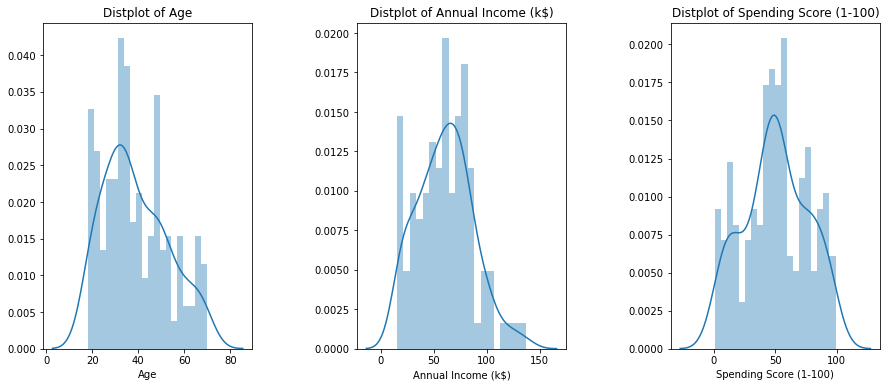

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

# Distributions of the Features

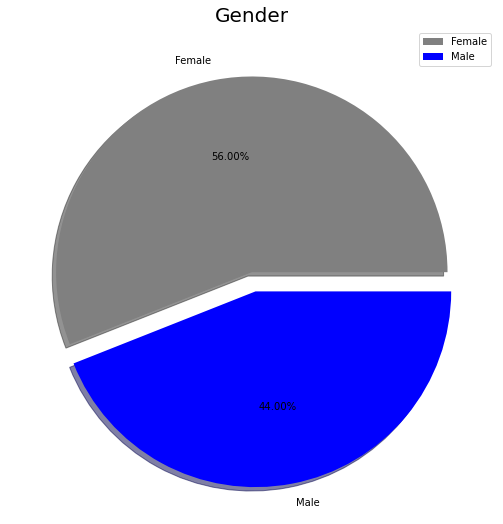

In [8]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['gray', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Count of Genders

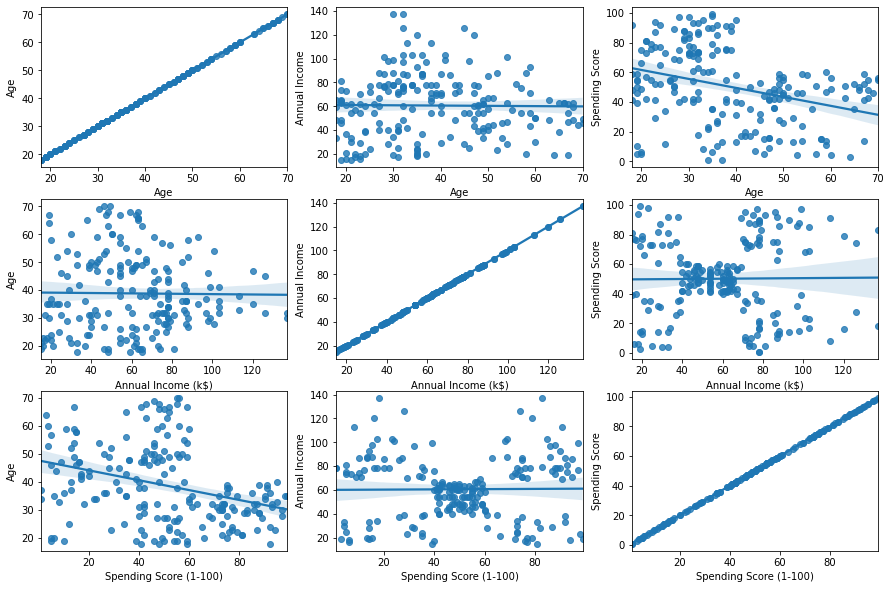

In [9]:
# Plotting the Relation between features
plt.figure(1 , figsize = (15 , 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.2 , wspace = 0.2)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

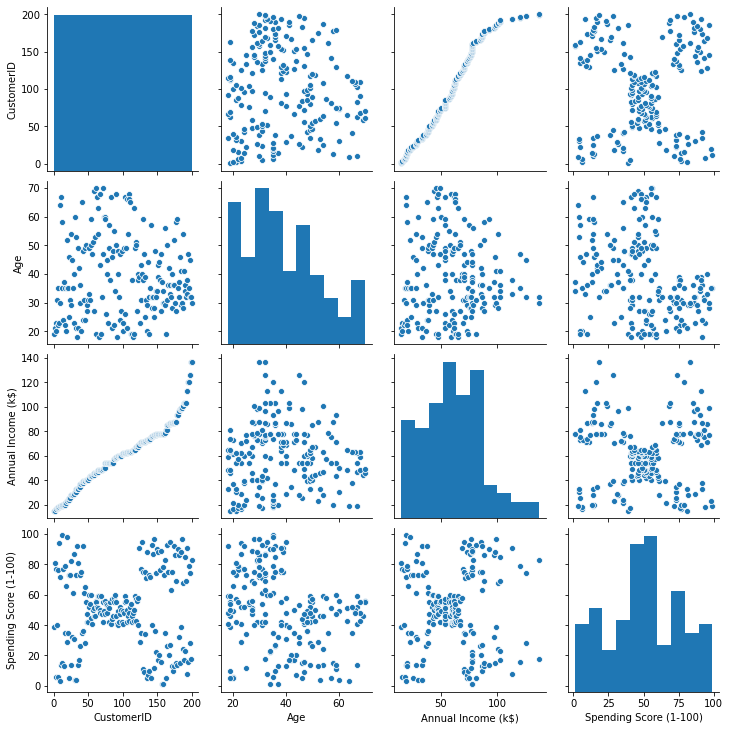

In [10]:
sns.pairplot(df)
plt.show()

In [11]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

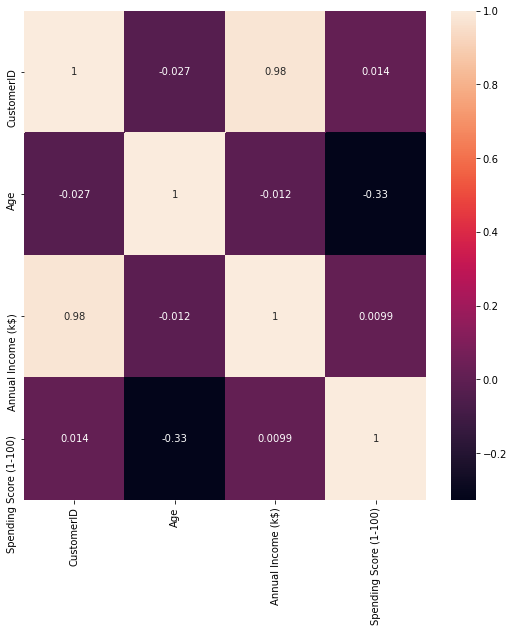

In [12]:
# correlation
sns.heatmap(df.corr(), annot = True)
plt.show()

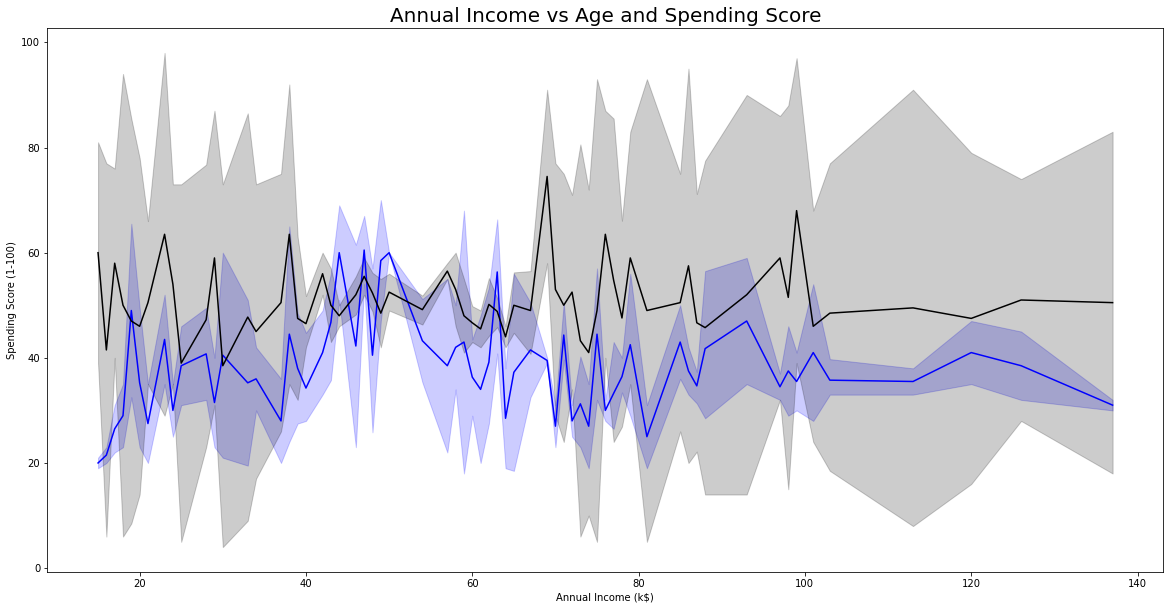

In [13]:
# Analysing the Annual Income with the Age and spending score
plt.figure(1 , figsize = (20 , 10))
sns.lineplot(df['Annual Income (k$)'],df['Age'], color = 'blue')
sns.lineplot(df['Annual Income (k$)'],df['Spending Score (1-100)'], color = 'black')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

In [14]:
# Feature selection 
x = df[['Age' , 'Spending Score (1-100)']]
x = x.iloc[: , :].values

Modelling and finding Clusters

In [15]:
# Finding Clusters by the Kmeans algorithm  (Elbow Method)
from sklearn.cluster import KMeans
inertia = []
for n in range(1 , 11):
    model = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=500, tol=0.0001,  random_state= 42  , algorithm='elkan') )
    model.fit(x)
    inertia.append(model.inertia_)

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:974: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


In [16]:
model.labels_

array([3, 1, 9, 1, 3, 1, 7, 5, 0, 1, 0, 5, 0, 1, 7, 1, 6, 4, 6, 5, 6, 1,
       7, 1, 0, 1, 6, 4, 6, 5, 0, 1, 0, 5, 7, 1, 7, 1, 6, 1, 8, 5, 6, 4,
       6, 4, 2, 3, 3, 3, 2, 4, 4, 8, 2, 2, 2, 8, 4, 2, 8, 4, 8, 2, 8, 4,
       2, 8, 4, 3, 8, 2, 8, 8, 8, 4, 2, 2, 4, 2, 8, 2, 8, 2, 4, 2, 2, 4,
       4, 2, 8, 3, 2, 6, 3, 4, 2, 4, 2, 3, 3, 2, 8, 4, 2, 3, 8, 2, 8, 8,
       8, 4, 6, 3, 3, 4, 8, 2, 2, 2, 4, 6, 2, 5, 3, 1, 6, 5, 0, 1, 7, 1,
       3, 1, 9, 5, 7, 1, 9, 1, 0, 5, 3, 5, 9, 5, 6, 1, 7, 5, 7, 5, 7, 1,
       7, 5, 7, 1, 7, 1, 6, 1, 9, 5, 6, 1, 7, 5, 6, 4, 7, 1, 7, 5, 0, 5,
       0, 1, 0, 5, 6, 5, 7, 5, 6, 5, 0, 1, 7, 5, 7, 1, 7, 5, 7, 1, 6, 1,
       7, 1], dtype=int32)

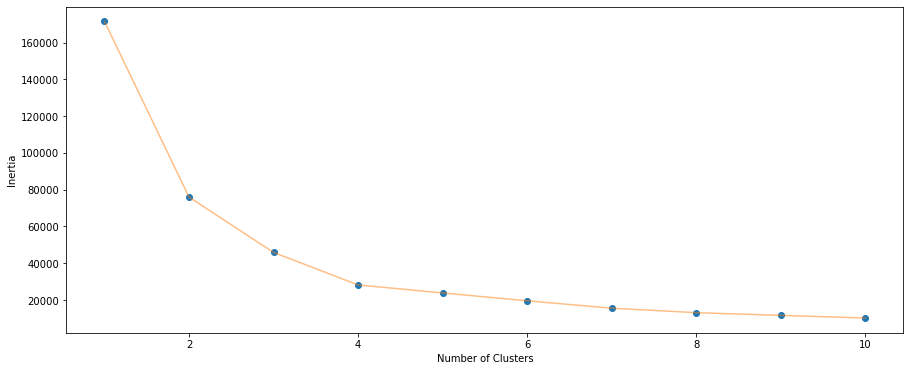

In [17]:
# Plotting the clusters

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

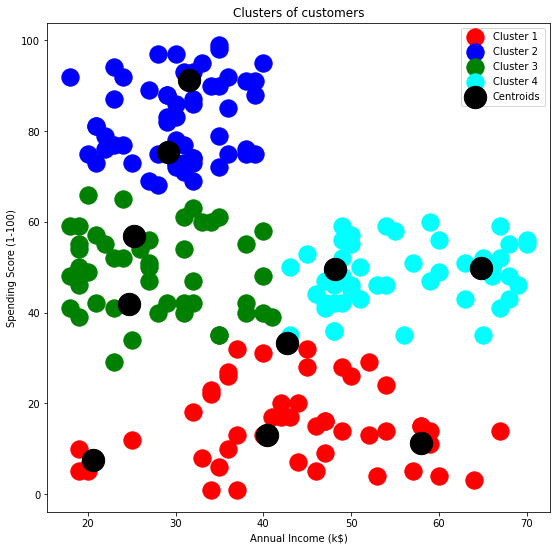

In [18]:
# view of the clusters and the centroids by the algorithm
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(x)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 300, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 300, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 300, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 300, c = 'cyan', label = 'Cluster 4')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 500, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
# Plotting the 3D visualization for better view of the clusters

labels3 = model.labels_
centroids3 = model.cluster_centers_
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 5,
        line=dict(
            color= df['label3'],
            width= 2000
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Hierarchical Clustering

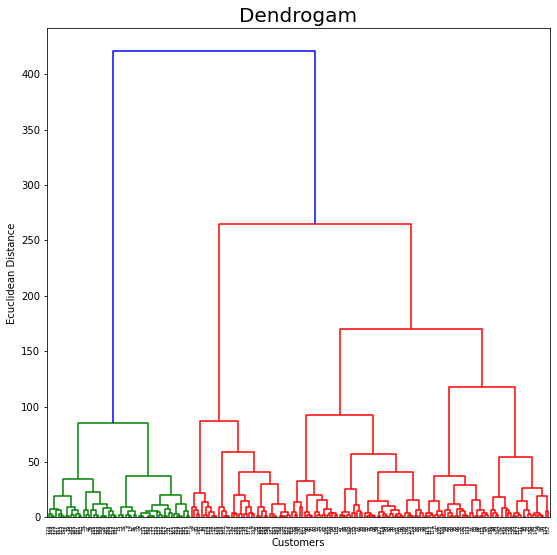

In [20]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

Agglomerative Clustering

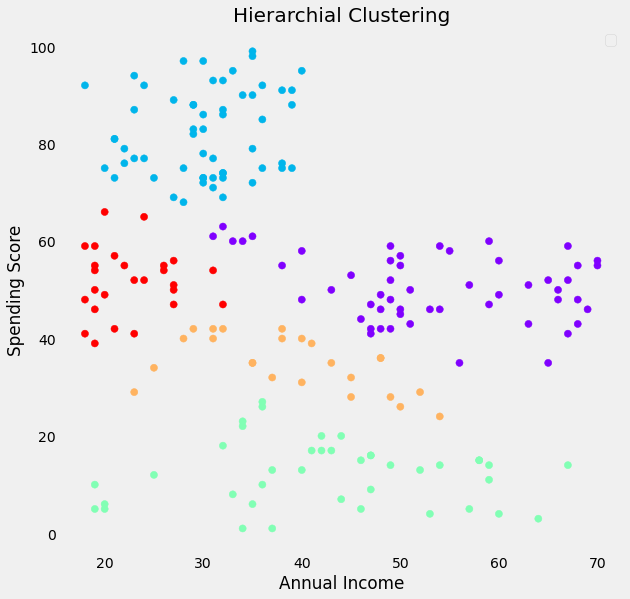

In [29]:
#Agglomerative Clustering (Recursively merges the pair of clusters that minimally increases a given linkage distance.)

from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[:,0],x[:,1], c=hc.labels_, cmap='rainbow',s = 50)
plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()